In [19]:
import matplotlib.pyplot as plt
import polars as pl
import pyarrow as pa

WP_data = pl.read_csv('world_population.csv')


WP_data.head()

Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
i64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64
36,"""AFG""","""Afghanistan""","""Kabul""","""Asia""",41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
138,"""ALB""","""Albania""","""Tirana""","""Europe""",2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
34,"""DZA""","""Algeria""","""Algiers""","""Africa""",44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
213,"""ASM""","""American Samoa…","""Pago Pago""","""Oceania""",44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.0
203,"""AND""","""Andorra""","""Andorra la Vel…","""Europe""",79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.01,0.0


In [5]:
WP_data.columns

['Rank',
 'CCA3',
 'Country/Territory',
 'Capital',
 'Continent',
 '2022 Population',
 '2020 Population',
 '2015 Population',
 '2010 Population',
 '2000 Population',
 '1990 Population',
 '1980 Population',
 '1970 Population',
 'Area (km²)',
 'Density (per km²)',
 'Growth Rate',
 'World Population Percentage']

In [6]:
#country's population in 2022, growth rate and area.

df = WP_data[['2022 Population','Growth Rate','Area (km²)']]

# Head 5 rows
print("=== Dataset Overview ===")
print(df.head())
print("\n")

=== Dataset Overview ===
shape: (5, 3)
┌─────────────────┬─────────────┬────────────┐
│ 2022 Population ┆ Growth Rate ┆ Area (km²) │
│ ---             ┆ ---         ┆ ---        │
│ i64             ┆ f64         ┆ i64        │
╞═════════════════╪═════════════╪════════════╡
│ 41128771        ┆ 1.0257      ┆ 652230     │
│ 2842321         ┆ 0.9957      ┆ 28748      │
│ 44903225        ┆ 1.0164      ┆ 2381741    │
│ 44273           ┆ 0.9831      ┆ 199        │
│ 79824           ┆ 1.01        ┆ 468        │
└─────────────────┴─────────────┴────────────┘




In [7]:
# Summary statistics using the describe method
summary_stats = df.describe()
print("=== Descriptive Statistics Overview ===")
print(summary_stats)
print("\n")

=== Descriptive Statistics Overview ===
shape: (9, 4)
┌────────────┬─────────────────┬─────────────┬───────────────┐
│ describe   ┆ 2022 Population ┆ Growth Rate ┆ Area (km²)    │
│ ---        ┆ ---             ┆ ---         ┆ ---           │
│ str        ┆ f64             ┆ f64         ┆ f64           │
╞════════════╪═════════════════╪═════════════╪═══════════════╡
│ count      ┆ 234.0           ┆ 234.0       ┆ 234.0         │
│ null_count ┆ 0.0             ┆ 0.0         ┆ 0.0           │
│ mean       ┆ 3.4074e7        ┆ 1.009577    ┆ 581449.384615 │
│ std        ┆ 1.3677e8        ┆ 0.013385    ┆ 1.7618e6      │
│ min        ┆ 510.0           ┆ 0.912       ┆ 1.0           │
│ 25%        ┆ 409984.0        ┆ 1.0017      ┆ 2586.0        │
│ 50%        ┆ 5.579144e6      ┆ 1.0079      ┆ 83534.0       │
│ 75%        ┆ 2.259359e7      ┆ 1.0171      ┆ 438317.0      │
│ max        ┆ 1.4259e9        ┆ 1.0691      ┆ 1.7098242e7   │
└────────────┴─────────────────┴─────────────┴───────────────┘



In [8]:
# Mean, Median and Mode
print("=== Mean and Median Overview ===")
mean = df.mean()
median = df.median()
print("Mean:\n", mean)
print("Median:\n", median)
print("\n")

=== Mean and Median Overview ===
Mean:
 shape: (1, 3)
┌─────────────────┬─────────────┬───────────────┐
│ 2022 Population ┆ Growth Rate ┆ Area (km²)    │
│ ---             ┆ ---         ┆ ---           │
│ f64             ┆ f64         ┆ f64           │
╞═════════════════╪═════════════╪═══════════════╡
│ 3.4074e7        ┆ 1.009577    ┆ 581449.384615 │
└─────────────────┴─────────────┴───────────────┘
Median:
 shape: (1, 3)
┌─────────────────┬─────────────┬────────────┐
│ 2022 Population ┆ Growth Rate ┆ Area (km²) │
│ ---             ┆ ---         ┆ ---        │
│ f64             ┆ f64         ┆ f64        │
╞═════════════════╪═════════════╪════════════╡
│ 5559944.5       ┆ 1.0079      ┆ 81199.5    │
└─────────────────┴─────────────┴────────────┘




In [9]:
# Variance and standard deviation
variance = df.var()
std_deviation = df.std()
print("=== Variance and standard deviation Overview ===")
print("Variance:\n", variance)
print("Standard Deviation:\n", std_deviation)

=== Variance and standard deviation Overview ===
Variance:
 shape: (1, 3)
┌─────────────────┬─────────────┬────────────┐
│ 2022 Population ┆ Growth Rate ┆ Area (km²) │
│ ---             ┆ ---         ┆ ---        │
│ f64             ┆ f64         ┆ f64        │
╞═════════════════╪═════════════╪════════════╡
│ 1.8705e16       ┆ 0.000179    ┆ 3.1041e12  │
└─────────────────┴─────────────┴────────────┘
Standard Deviation:
 shape: (1, 3)
┌─────────────────┬─────────────┬────────────┐
│ 2022 Population ┆ Growth Rate ┆ Area (km²) │
│ ---             ┆ ---         ┆ ---        │
│ f64             ┆ f64         ┆ f64        │
╞═════════════════╪═════════════╪════════════╡
│ 1.3677e8        ┆ 0.013385    ┆ 1.7618e6   │
└─────────────────┴─────────────┴────────────┘


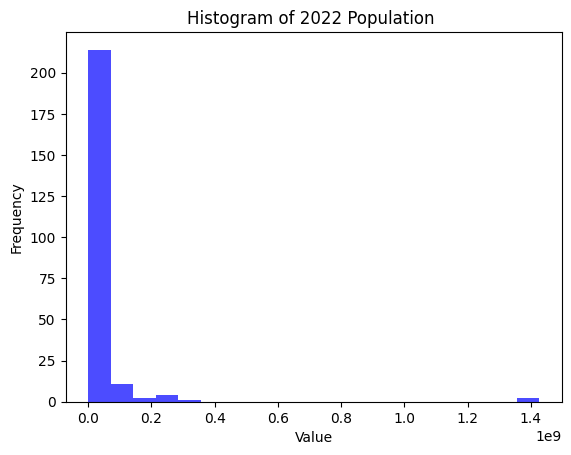

In [10]:
plt.hist(df[['2022 Population']], bins=20, color='blue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 2022 Population ')
plt.show()

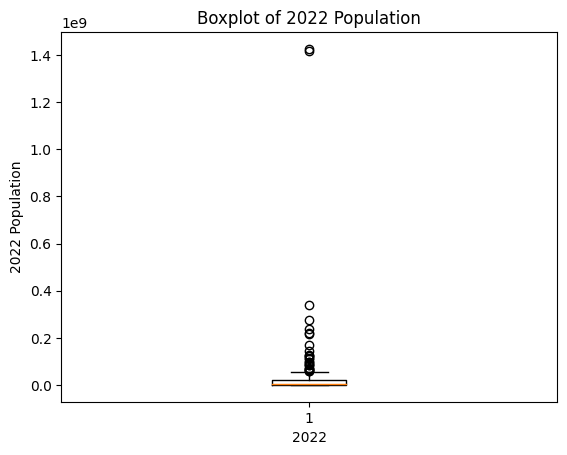

In [11]:
# Create a boxplot
plt.boxplot(df[['2022 Population']])

# Add labels and title
plt.xlabel('2022')
plt.ylabel('2022 Population')
plt.title('Boxplot of 2022 Population')

# Show the plot
plt.show()